In [962]:
import os 
import sys
import time
import datetime
import itertools
import collections

import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [963]:
# mini_train = pd.read_csv('alfabattle2_abattle_train_target.csv', 
#                          parse_dates=['timestamp']).sort_values(['client_pin', 'timestamp']).reset_index(drop=True)
# mini_train.head(3)

In [964]:
# for label in mini_train.multi_class_target.unique():
#     mini_train.loc[:, f'bool_{label}'] = (mini_train.multi_class_target == label).astype('int')
# for label in mini_train.multi_class_target.unique():
#     mini_train.loc[:, f'10days_act_{label}'] = np.nan
# for label in mini_train.multi_class_target.unique():
#     mini_train.loc[:, f'30days_act_{label}'] = np.nan

# mini_train.drop(columns=['session_id', 'multi_class_target'], inplace=True)
# mini_train.head(3)

In [965]:
# %%time
# for client in mini_train.client_pin.unique():
#     client_data = mini_train.loc[mini_train.client_pin == client, :]
#     client_times = client_data.timestamp
#     if client_data.shape[0] > 1:
#         client_data.loc[mini_train.timestamp == client_times.iloc[0], '10days_act_statement':] = 0
#         for t in client_times.iloc[1:]:
#             client_data.loc[client_data.timestamp == t, '10days_act_statement':'10days_act_own_transfer'] = \
#                             client_data.loc[(t-client_data.timestamp).astype('timedelta64[D]').between(1, 10, inclusive=True), 
#                                             'bool_statement':'bool_own_transfer'].sum(axis=0).values
#             client_data.loc[client_data.timestamp == t, '30days_act_statement':'30days_act_own_transfer'] = \
#                             client_data.loc[(t-client_data.timestamp).astype('timedelta64[D]').between(1, 30, inclusive=True), 
#                                             'bool_statement':'bool_own_transfer'].sum(axis=0).values
#     else:
#         client_data.loc[client_data.timestamp == client_times, '10days_act_statement':] = 0
    
#     mini_train.loc[mini_train.client_pin == client, :] = client_data

In [966]:
# mini_train.to_pickle('mini_train.pkl')

In [967]:
train_part = pd.read_pickle('big_train.pkl')
train_part.drop(columns='session_id', inplace=True)
train_part.sort_values(['client_pin', 'timestamp'], inplace=True)
train_part.reset_index(inplace=True, drop=True)
print(train_part.shape)
train_part.head(3)

(5065350, 40)


,client_pin,timestamp,multi_class_target,zone,city,anketa,mobile_x,retail,site,duration,...,SingleStatement,Widget Dashboard,mobile_y,user,net_connection_type,device_is_webview,online_alfa_ru,click_alfa_ru,anketa_alfa_ru,alfa_ru
0,000033b6509acd1c8eb0d06ebd2e1de9,2020-02-02 22:31:04,statement,Europe,Moscow,0.0,1.0,0.0,0.0,20215.0,...,0.25,0.0,0.0,0.0,mobile,True,False,False,False,False
1,000033b6509acd1c8eb0d06ebd2e1de9,2020-02-19 18:37:26,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,4079.0,...,NaN,NaN,NaN,NaN,mobile,True,False,False,False,False
2,000033b6509acd1c8eb0d06ebd2e1de9,2020-02-22 23:18:45,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,6843.0,...,NaN,NaN,NaN,NaN,mobile,True,False,False,False,False


In [968]:
train_part.loc[:, 'Advice':'user'] = train_part.loc[:, 'Advice':'user'].apply(lambda x: x.fillna(x.mean()), axis=0)

In [969]:
test_part = pd.read_csv('alfabattle2_prediction_session_timestamp.csv', parse_dates=['timestamp'])
test_part.loc[:, 'multi_class_target'] = 'need_to_predict'
for col in list(train_part.loc[:, 'zone':].columns):
    test_part.loc[:, col] = np.nan
print(test_part.shape)
test_part.head(3)

(79268, 40)


,client_pin,timestamp,multi_class_target,zone,city,anketa,mobile_x,retail,site,duration,...,SingleStatement,Widget Dashboard,mobile_y,user,net_connection_type,device_is_webview,online_alfa_ru,click_alfa_ru,anketa_alfa_ru,alfa_ru
0,f0c674b2bb4dc64be607029271d706ec,2020-08-01 00:00:53,need_to_predict,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90725b54ce77576883813d87749df6bd,2020-08-01 00:02:57,need_to_predict,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eb0f82d74c7b7bd5eafbd5b5f8cb3e2a,2020-08-01 00:03:14,need_to_predict,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [970]:
sample_sub = pd.read_csv('alfabattle2_abattle_sample_prediction.csv')
print(sample_sub.shape)
sample_sub.head(3)

(79268, 2)


,client_pin,prediction
0,f0c674b2bb4dc64be607029271d706ec,credit_info
1,90725b54ce77576883813d87749df6bd,credit_info
2,eb0f82d74c7b7bd5eafbd5b5f8cb3e2a,own_transfer


In [971]:
Xy = pd.concat([train_part, test_part], axis=0).sort_values(['client_pin', 'timestamp'], ascending=[True, True])
Xy.reset_index(inplace=True, drop=True)
print(Xy.shape)
Xy.head(3)

(5144618, 40)


,client_pin,timestamp,multi_class_target,zone,city,anketa,mobile_x,retail,site,duration,...,SingleStatement,Widget Dashboard,mobile_y,user,net_connection_type,device_is_webview,online_alfa_ru,click_alfa_ru,anketa_alfa_ru,alfa_ru
0,000033b6509acd1c8eb0d06ebd2e1de9,2020-02-02 22:31:04,statement,Europe,Moscow,0.0,1.0,0.0,0.0,20215.0,...,0.250000,0.000000,0.00000,0.000000,mobile,1.0,0.0,0.0,0.0,0.0
1,000033b6509acd1c8eb0d06ebd2e1de9,2020-02-19 18:37:26,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,4079.0,...,0.097915,0.029769,0.00117,0.001822,mobile,1.0,0.0,0.0,0.0,0.0
2,000033b6509acd1c8eb0d06ebd2e1de9,2020-02-22 23:18:45,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,6843.0,...,0.097915,0.029769,0.00117,0.001822,mobile,1.0,0.0,0.0,0.0,0.0


In [972]:
Xy.loc[:, 'zone':] = Xy.groupby('client_pin').shift(1).drop(columns=['timestamp', 'multi_class_target'])

In [973]:
for k in range(1, 11, 1):
    print(k)
    Xy.loc[:, f'target_lag_{k}'] = Xy.groupby(['client_pin'])['multi_class_target'].shift(k)
    if k < 6:
        Xy.loc[:, f'time_diff_{k}'] = Xy.groupby(['client_pin'])['timestamp'].diff(k).astype('timedelta64[s]')

1
2
3
4
5
6
7
8
9
10


In [974]:
%%time
Xy.loc[:, 'sessions_count'] = Xy.groupby('client_pin').cumcount() + 1
Xy.loc[:, 'sessions_count'] = Xy.groupby('client_pin')['sessions_count'].shift(1)

for col in train_part.multi_class_target.unique():
    print(col)
    Xy.loc[:, f'{col}_count'] = Xy.groupby('client_pin').apply(
        lambda group: (group.multi_class_target == col).cumsum()
    ).reset_index().multi_class_target.shift(1).values
    Xy.loc[:, f'{col}_frac'] = Xy.loc[:, f'{col}_count'] / Xy.loc[:, 'sessions_count']

Xy_cleaned = Xy.groupby('client_pin').apply(lambda group: group.iloc[10:, 1:] \
                                            if group.shape[0] >= 11 else group.iloc[:, 1:]
                                           ).reset_index().drop(columns=['level_1'])

Xy_cleaned.loc[:, 'hour'] = Xy_cleaned.timestamp.dt.hour
Xy_cleaned.drop(columns=['timestamp'], inplace=True)
print(Xy_cleaned.shape)
Xy_cleaned.head(3)

statement
main_screen
mobile_recharge
chat
credit_info
card_recharge
phone_money_transfer
invest
card2card_transfer
own_transfer
(4490728, 76)
CPU times: user 9min 46s, sys: 1min 7s, total: 10min 53s
Wall time: 10min 52s


,client_pin,multi_class_target,zone,city,anketa,mobile_x,retail,site,duration,pv,...,card_recharge_frac,phone_money_transfer_count,phone_money_transfer_frac,invest_count,invest_frac,card2card_transfer_count,card2card_transfer_frac,own_transfer_count,own_transfer_frac,hour
0,000033b6509acd1c8eb0d06ebd2e1de9,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,12080.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
1,000033b6509acd1c8eb0d06ebd2e1de9,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,13604.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
2,000033b6509acd1c8eb0d06ebd2e1de9,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,11913.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16


In [975]:
del Xy, train_part, test_part

#### Продолжаем

In [976]:
Xy_cleaned.drop(columns=['main_screen_count', 'invest_count', 'statement_count', 'phone_money_transfer_count', 'own_transfer_count', 
                         'credit_info_count', 'chat_count', 'card2card_transfer_count', 'mobile_recharge_count', 'card_recharge_count',
                         'device_is_webview', 'online_alfa_ru', 'click_alfa_ru', 'anketa_alfa_ru', 'alfa_ru'],
                inplace=True) # 'anketa_alfa_ru', 'alfa_ru'

In [977]:
Xy_cleaned.loc[:, 'zone':'city'] = Xy_cleaned.loc[:, 'zone':'city'].fillna(method='ffill')
Xy_cleaned.loc[:, 'anketa':'user'] = Xy_cleaned.loc[:, 'anketa':'user'].apply(lambda x: x.fillna(x.mean()), axis=0)
Xy_cleaned.loc[:, 'net_connection_type'] = Xy_cleaned.loc[:, 'net_connection_type'].fillna(method='ffill')
# Xy_cleaned.loc[:, 'online_alfa_ru':'alfa_ru'] = Xy_cleaned.loc[:, 'online_alfa_ru':'alfa_ru'].fillna(0)

Xy_cleaned = Xy_cleaned.groupby('client_pin').apply(lambda group: group.iloc[-40:, 1:]).reset_index()
Xy_cleaned.drop(columns=['level_1'], inplace=True)

In [978]:
Xy_cleaned.shape

(1915209, 61)

In [979]:
Xy_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915209 entries, 0 to 1915208
Data columns (total 61 columns):
client_pin                   object
multi_class_target           object
zone                         object
city                         object
anketa                       float64
mobile_x                     float64
retail                       float64
site                         float64
duration                     float64
pv                           float64
se                           float64
sv                           float64
ue                           float64
Advice                       float64
All Payments                 float64
Application Lifecycle        float64
Bank_Offer                   float64
Bottom Navigation            float64
Card To Card Transfer        float64
Chat                         float64
ClientPhoneTransfer          float64
Credit Info                  float64
Investments                  float64
Main Screen                  float64
Ope

In [980]:
import psutil
psutil.virtual_memory()

svmem(total=33738039296, available=21677592576, percent=35.7, used=11621912576, free=14731730944, active=12405329920, inactive=6036803584, buffers=190984192, cached=7193411584, shared=21786624, slab=449232896)

In [981]:
for col in Xy_cleaned.columns:
    if Xy_cleaned[col].dtypes == 'int64':
        Xy_cleaned[col] = pd.to_numeric(Xy_cleaned[col], downcast = 'integer')
    elif Xy_cleaned[col].dtypes == 'float64':
        Xy_cleaned[col] = pd.to_numeric(Xy_cleaned[col], downcast = 'float')

In [982]:
psutil.virtual_memory()

svmem(total=33738039296, available=21903806464, percent=35.1, used=11395702784, free=14957862912, active=12179972096, inactive=6036803584, buffers=191004672, cached=7193468928, shared=21786624, slab=449376256)

In [986]:
Xy_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915209 entries, 0 to 1915208
Data columns (total 61 columns):
client_pin                   object
multi_class_target           object
zone                         object
city                         object
anketa                       float32
mobile_x                     float32
retail                       float32
site                         float32
duration                     float32
pv                           float32
se                           float32
sv                           float32
ue                           float32
Advice                       float32
All Payments                 float32
Application Lifecycle        float32
Bank_Offer                   float32
Bottom Navigation            float32
Card To Card Transfer        float32
Chat                         float32
ClientPhoneTransfer          float32
Credit Info                  float32
Investments                  float32
Main Screen                  float32
Ope

In [983]:
Xy_cleaned.multi_class_target.unique()

array(['main_screen', 'need_to_predict', 'statement', 'chat',
       'credit_info', 'card_recharge', 'mobile_recharge',
       'card2card_transfer', 'phone_money_transfer', 'own_transfer',
       'invest'], dtype=object)

In [988]:
for label in ['main_screen', 'statement', 'card_recharge', 'mobile_recharge']:
    print(label)
    for col in ['duration', 'se', 'sv', 'time_diff_1', 'time_diff_2', 'time_diff_3', 'time_diff_4', 'time_diff_5',
                'sessions_count', 'statement_frac', 'statement_frac', 'main_screen_frac', 
                'mobile_recharge_frac', 'chat_frac', 'credit_info_frac', 'card_recharge_frac', 
                'phone_money_transfer_frac', 'invest_frac', 'card2card_transfer_frac', 'own_transfer_frac']:
        Xy_cleaned.loc[:, f'{label}_{col}'] = (Xy_cleaned.target_lag_1 == label).astype('int') * Xy_cleaned.loc[:, col]

main_screen
statement
card_recharge
mobile_recharge


In [989]:
psutil.virtual_memory()

svmem(total=33738039296, available=20035338240, percent=40.6, used=13264171008, free=13082841088, active=14045896704, inactive=6041464832, buffers=191234048, cached=7199793152, shared=21786624, slab=449945600)

In [990]:
for label in ['card2card_transfer', 'phone_money_transfer', 'own_transfer', 'invest']:
    print(label)
    for col in ['duration', 'se', 'sv', 'time_diff_1', 'time_diff_2', 'time_diff_3', 'time_diff_4', 'time_diff_5',
                'sessions_count', 'statement_frac', 'statement_frac', 'main_screen_frac', 
                'mobile_recharge_frac', 'chat_frac', 'credit_info_frac', 'card_recharge_frac', 
                'phone_money_transfer_frac', 'invest_frac', 'card2card_transfer_frac', 'own_transfer_frac']:
        Xy_cleaned.loc[:, f'{label}_{col}'] = (Xy_cleaned.target_lag_1 == label).astype('int') * Xy_cleaned.loc[:, col]

card2card_transfer
phone_money_transfer
own_transfer
invest


In [991]:
psutil.virtual_memory()

svmem(total=33738039296, available=18867806208, percent=44.1, used=14431703040, free=11915214848, active=15211995136, inactive=6041444352, buffers=191283200, cached=7199838208, shared=21786624, slab=449826816)

In [992]:
for label in ['chat', 'credit_info']:
    print(label)
    for col in ['duration', 'se', 'sv', 'time_diff_1', 'time_diff_2', 'time_diff_3', 'time_diff_4', 'time_diff_5',
                'sessions_count', 'statement_frac', 'statement_frac', 'main_screen_frac', 
                'mobile_recharge_frac', 'chat_frac', 'credit_info_frac', 'card_recharge_frac', 
                'phone_money_transfer_frac', 'invest_frac', 'card2card_transfer_frac', 'own_transfer_frac']:
        Xy_cleaned.loc[:, f'{label}_{col}'] = (Xy_cleaned.target_lag_1 == label).astype('int') * Xy_cleaned.loc[:, col]

chat
credit_info


In [993]:
psutil.virtual_memory()

svmem(total=33738039296, available=17607102464, percent=47.8, used=15692402688, free=10654441472, active=16470884352, inactive=6041444352, buffers=191320064, cached=7199875072, shared=21786624, slab=449777664)

In [994]:
print(Xy_cleaned.shape)
Xy_cleaned.head(3)

(1915209, 251)


,client_pin,multi_class_target,zone,city,anketa,mobile_x,retail,site,duration,pv,...,credit_info_statement_frac,credit_info_main_screen_frac,credit_info_mobile_recharge_frac,credit_info_chat_frac,credit_info_credit_info_frac,credit_info_card_recharge_frac,credit_info_phone_money_transfer_frac,credit_info_invest_frac,credit_info_card2card_transfer_frac,credit_info_own_transfer_frac
0,000033b6509acd1c8eb0d06ebd2e1de9,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,25739.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000033b6509acd1c8eb0d06ebd2e1de9,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,10711.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000033b6509acd1c8eb0d06ebd2e1de9,main_screen,Europe,Moscow,0.0,1.0,0.0,0.0,98862.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [995]:
Xy_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915209 entries, 0 to 1915208
Columns: 251 entries, client_pin to credit_info_own_transfer_frac
dtypes: float32(235), int8(1), object(15)
memory usage: 1.9+ GB


In [996]:
%%time
Xy_cleaned_train_val = Xy_cleaned.groupby('client_pin').apply(lambda group: group.iloc[:-1, 1:]).reset_index()
Xy_cleaned_train_val.drop(columns=['level_1'], inplace=True)

Xy_cleaned_train = Xy_cleaned.groupby('client_pin').apply(lambda group: group.iloc[:-2, 1:]).reset_index()
Xy_cleaned_train.drop(columns=['level_1'], inplace=True)

Xy_cleaned_val = Xy_cleaned.groupby('client_pin').apply(lambda group: group.iloc[-2, 1:] \
                                                        if group.shape[0] > 1 else None).reset_index()

Xy_cleaned_test = Xy_cleaned.groupby('client_pin').apply(lambda group: group.iloc[-1, 1:]).reset_index()

Xy_cleaned_train_val.shape, Xy_cleaned_train.shape, Xy_cleaned_val.shape, Xy_cleaned_test.shape

CPU times: user 7min 11s, sys: 14.7 s, total: 7min 25s
Wall time: 7min 25s


((1835941, 251), (1758055, 251), (79268, 251), (79268, 251))

In [997]:
Xy_cleaned_val = Xy_cleaned_val.loc[Xy_cleaned_val.client_pin.isin(Xy_cleaned_train.client_pin.unique())]
Xy_cleaned_val.shape

(74943, 251)

In [998]:
del Xy_cleaned

In [999]:
X_train_val, y_train_val = Xy_cleaned_train_val.drop(columns=['multi_class_target']), Xy_cleaned_train_val['multi_class_target']
X_test, y_test = Xy_cleaned_test.drop(columns=['multi_class_target']), Xy_cleaned_test['multi_class_target']

X_train, y_train = Xy_cleaned_train.drop(columns=['multi_class_target']), Xy_cleaned_train['multi_class_target']
X_val, y_val = Xy_cleaned_val.drop(columns=['multi_class_target']), Xy_cleaned_val['multi_class_target']

In [1000]:
cat_features = ['client_pin', 'zone', 'city', 'net_connection_type'] + [f'target_lag_{k}' for k in range(1, 11, 1)] + ['hour']
num_features = [f'time_diff_{k}' for k in range(1, 6, 1)]

In [1001]:
for data in [X_train_val, X_test, X_train, X_val]:
    data[cat_features] = data[cat_features].fillna(value='nan_category')
    data[num_features] = data[num_features].fillna(value=50*10**6)
    data.loc[:, 'sessions_count':'own_transfer_frac'] = data.loc[:, 'sessions_count':'own_transfer_frac'].fillna(0)
    data['sessions_count'] = data['sessions_count'].astype('int')
    data['hour'] = data['hour'].astype('int')

In [1004]:
y_train_val.unique()

array(['main_screen', 'statement', 'chat', 'credit_info', 'card_recharge',
       'mobile_recharge', 'card2card_transfer', 'phone_money_transfer',
       'own_transfer', 'invest'], dtype=object)

In [1006]:
for data in [X_train_val, X_test, X_train, X_val]:
    for col in y_train_val.unique():
        for tim in range(1, 6):
            data[f'{col}_time_diff_{tim}'] = data[f'{col}_time_diff_{tim}'].fillna(value=50*10**6)

In [1010]:
for data in [X_train_val, X_test, X_train, X_val]:
    data.fillna(0, inplace=True)

In [1011]:
X_train_val.columns[X_train_val.isna().sum() > 0]

Index([], dtype='object')

# Check point

In [880]:
%%time
# X_train_val, X_test = pd.read_csv('X_new_0.csv', header=0), pd.read_csv('X_new_1.csv', header=0)
# X_train, X_val = pd.read_csv('X_new_2.csv', header=0), pd.read_csv('X_new_3.csv', header=0)

# y_train_val, y_test = pd.read_csv('y_new_0.csv', header=0), pd.read_csv('y_new_1.csv', header=0)
# y_train, y_val = pd.read_csv('y_new_2.csv', header=0), pd.read_csv('y_new_3.csv', header=0)

CPU times: user 60 s, sys: 25.1 s, total: 1min 25s
Wall time: 2min 28s


In [1032]:
for data in [X_train_val, X_test, X_train, X_val]:
    for col in y_train_val.unique():
        data[f'{col}_1_day'] = (data.loc[:, [f'{col}_time_diff_1', f'{col}_time_diff_2',
                                             f'{col}_time_diff_3', f'{col}_time_diff_4',
                                             f'{col}_time_diff_5']] < 60 * 60 * 24 * 1).any(axis=1).astype('int')
        data[f'{col}_1_week'] = (data.loc[:, [f'{col}_time_diff_1', f'{col}_time_diff_2',
                                              f'{col}_time_diff_3', f'{col}_time_diff_4',
                                              f'{col}_time_diff_5']] < 60 * 60 * 24 * 7).any(axis=1).astype('int')
        data[f'{col}_1_month'] = (data.loc[:, [f'{col}_time_diff_1', f'{col}_time_diff_2',
                                               f'{col}_time_diff_3', f'{col}_time_diff_4',
                                               f'{col}_time_diff_5']] < 60 * 60 * 24 * 31).any(axis=1).astype('int')

In [1053]:
for data in [X_train_val, X_test, X_train, X_val]:
    for col in y_train_val.unique():
        data[f'{col}_fromday_toweek'] = data[f'{col}_1_week'] - data[f'{col}_1_day']
        data[f'{col}_fromweek_tomonth'] = data[f'{col}_1_month'] - data[f'{col}_1_week']

In [1058]:
for data in [X_train_val, X_test, X_train, X_val]:
    data.drop(columns=['anketa', 'site', 'ue', 'mobile_y', 'user', 'statement_time_diff_5',
                       'card_recharge_time_diff_2', 'card_recharge_time_diff_4',
                       'card_recharge_time_diff_5', 'card_recharge_phone_money_transfer_frac',
                       'mobile_recharge_time_diff_3', 'mobile_recharge_invest_frac',
                       'card2card_transfer_time_diff_1', 'card2card_transfer_time_diff_3',
                       'card2card_transfer_time_diff_4', 'phone_money_transfer_time_diff_1',
                       'phone_money_transfer_card_recharge_frac', 'own_transfer_time_diff_1',
                       'own_transfer_time_diff_2', 'own_transfer_time_diff_5',
                       'invest_duration', 'invest_se', 'invest_time_diff_1',
                       'invest_time_diff_3', 'invest_time_diff_5', 'invest_sessions_count',
                       'invest_mobile_recharge_frac', 'invest_chat_frac',
                       'invest_credit_info_frac', 'invest_card_recharge_frac',
                       'invest_phone_money_transfer_frac', 'invest_card2card_transfer_frac',
                       'invest_own_transfer_frac', 'chat_phone_money_transfer_frac',
                       'credit_info_time_diff_1', 'credit_info_time_diff_3',
                       'credit_info_time_diff_4', 'main_screen_1_week', 'main_screen_1_month',
                       'statement_1_day', 'statement_1_week', 'statement_1_month',
                       'chat_1_day', 'chat_1_week', 'chat_1_month', 'credit_info_1_day',
                       'credit_info_1_week', 'credit_info_1_month', 'card_recharge_1_day',
                       'card_recharge_1_week', 'card_recharge_1_month',
                       'mobile_recharge_1_day', 'mobile_recharge_1_week',
                       'mobile_recharge_1_month', 'card2card_transfer_1_day',
                       'card2card_transfer_1_week', 'card2card_transfer_1_month',
                       'phone_money_transfer_1_day', 'phone_money_transfer_1_week',
                       'phone_money_transfer_1_month', 'own_transfer_1_day',
                       'own_transfer_1_week', 'own_transfer_1_month', 'invest_1_day',
                       'invest_1_week', 'invest_1_month'], inplace=True)

## Modeling

In [1034]:
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from hyperopt import fmin, tpe, hp

In [1060]:
#!XL
scores = {}

def hyperopt_opt_score(params):
    n_estims, depth, reg, eta, bins = params['n_estimators'], params['depth'], params['l2_leaf_reg'], params['eta'], params['border_count']
    
    model = CatBoostClassifier(allow_writing_files=False, verbose=False, cat_features=cat_features,
                               task_type='GPU', devices='0-31', random_seed=42, border_count=bins,
                               n_estimators=n_estims, depth=depth, l2_leaf_reg=reg, eta=eta).fit(X_train, y_train)
    
    f_scores = [round(f1_score(y_true=y_train, y_pred=model.predict(X_train), average='macro'), 5),
                round(f1_score(y_true=y_val, y_pred=model.predict(X_val), average='macro'), 5)]
    
    scores[f'n = {n_estims}, depth = {depth}, reg = {reg}, eta = {eta}, max_bin = {bins}'] = f_scores
    
    return -f_scores[1]

cb_space = {
    'eta': hp.uniform('eta', 0.01, 0.30),
    'depth': hp.choice('depth', np.arange(2, 10, 1)),
    'border_count': hp.choice('border_count', [128, 254]),
    'n_estimators': hp.choice('n_estimators', np.arange(200, 950, 50)),
    'l2_leaf_reg': hp.choice('l2_leaf_reg', np.arange(2, 15, 1))
}

best_params = fmin(fn=hyperopt_opt_score, space=cb_space, algo=tpe.suggest, max_evals=70)

best_params['border_count'] = [128, 254][best_params['border_count']]
best_params['n_estimators'] = np.arange(200, 950, 50)[best_params['n_estimators']]
best_params['l2_leaf_reg'] = np.arange(2, 15, 1)[best_params['l2_leaf_reg']]
best_params['depth'] = np.arange(2, 10, 1)[best_params['depth']]

print(best_params)

100%|██████████| 70/70 [1:36:42<00:00, 82.89s/trial, best loss: -0.39676]]
{'border_count': 254, 'depth': 5, 'eta': 0.14068468408688228, 'l2_leaf_reg': 4, 'n_estimators': 750}


In [1061]:
sorted(scores.items(), key=lambda item: (item[1][1], item[1][0]), reverse=True)[:10]

[('n = 750, depth = 5, reg = 4, eta = 0.14068468408688228, max_bin = 254',
  [0.44797, 0.39676]),
 ('n = 850, depth = 5, reg = 7, eta = 0.19971516366355838, max_bin = 254',
  [0.45058, 0.39671]),
 ('n = 800, depth = 6, reg = 6, eta = 0.1503096183828421, max_bin = 128',
  [0.45345, 0.39665]),
 ('n = 850, depth = 5, reg = 7, eta = 0.08573044895052788, max_bin = 254',
  [0.44559, 0.39654]),
 ('n = 750, depth = 5, reg = 4, eta = 0.24053544641765873, max_bin = 254',
  [0.45119, 0.39613]),
 ('n = 250, depth = 6, reg = 5, eta = 0.20177102384469317, max_bin = 128',
  [0.44496, 0.39611]),
 ('n = 800, depth = 6, reg = 8, eta = 0.25077196682387765, max_bin = 128',
  [0.45804, 0.39608]),
 ('n = 800, depth = 6, reg = 6, eta = 0.0926713301546036, max_bin = 254',
  [0.44904, 0.39587]),
 ('n = 450, depth = 5, reg = 6, eta = 0.14721503682385587, max_bin = 254',
  [0.44449, 0.39582]),
 ('n = 500, depth = 6, reg = 8, eta = 0.23604336358875777, max_bin = 128',
  [0.45186, 0.39579])]

In [1062]:
#!XL
model = CatBoostClassifier(allow_writing_files=False, verbose=100, cat_features=cat_features, random_seed=42, border_count=254,
                           task_type='GPU', devices='0-31', n_estimators=750, depth=5, l2_leaf_reg=4, eta=0.14)
model.fit(X_train_val, y_train_val)

0:	learn: 2.0599752	total: 61.3ms	remaining: 45.9s
100:	learn: 1.1983364	total: 5.29s	remaining: 34s
200:	learn: 1.1847928	total: 9.69s	remaining: 26.5s
300:	learn: 1.1786704	total: 14.4s	remaining: 21.5s
400:	learn: 1.1746762	total: 19.1s	remaining: 16.6s
500:	learn: 1.1718506	total: 23.5s	remaining: 11.7s
600:	learn: 1.1694705	total: 27.6s	remaining: 6.84s
700:	learn: 1.1674752	total: 31.6s	remaining: 2.21s
749:	learn: 1.1665382	total: 33.6s	remaining: 0us


In [1063]:
# сохраняем модель
import joblib
joblib.dump(value=model, filename='catboost_model_11.pkl')

['catboost_model_11.pkl']

# Check point

In [892]:
%%time

# import joblib
# model = joblib.load('catboost_model_9.pkl')

# X_train_val, X_test = pd.read_csv('X_new_0.csv', header=0), pd.read_csv('X_new_1.csv', header=0)
# X_train, X_val = pd.read_csv('X_new_2.csv', header=0), pd.read_csv('X_new_3.csv', header=0)

# y_train_val, y_test = pd.read_csv('y_new_0.csv', header=0), pd.read_csv('y_new_1.csv', header=0)
# y_train, y_val = pd.read_csv('y_new_2.csv', header=0), pd.read_csv('y_new_3.csv', header=0)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 149 ms


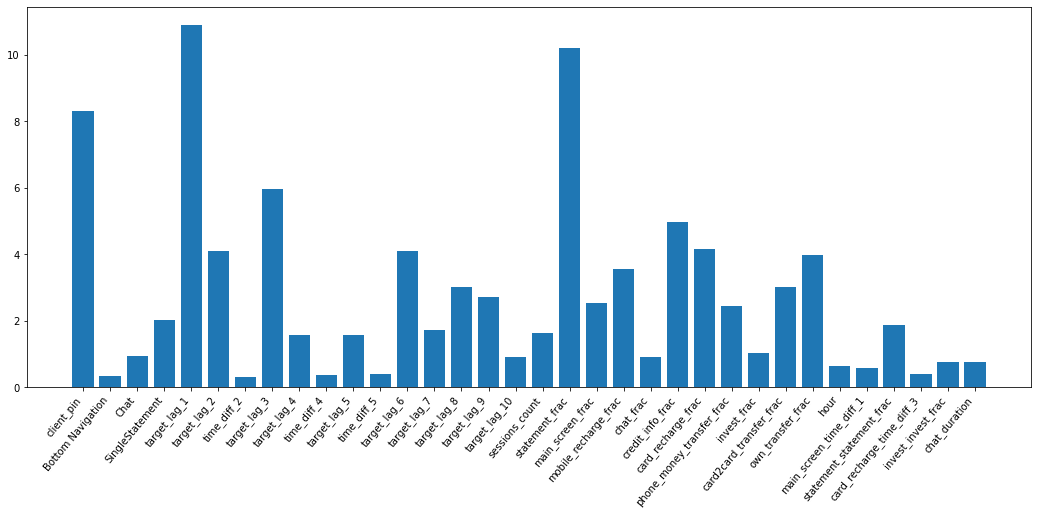

In [1064]:
plt.figure(figsize=(18, 7))
plt.bar(X_test.columns[model.feature_importances_ > 0.3], model.feature_importances_[model.feature_importances_ > 0.3])
plt.xticks(rotation=50, ha='right')
plt.show()

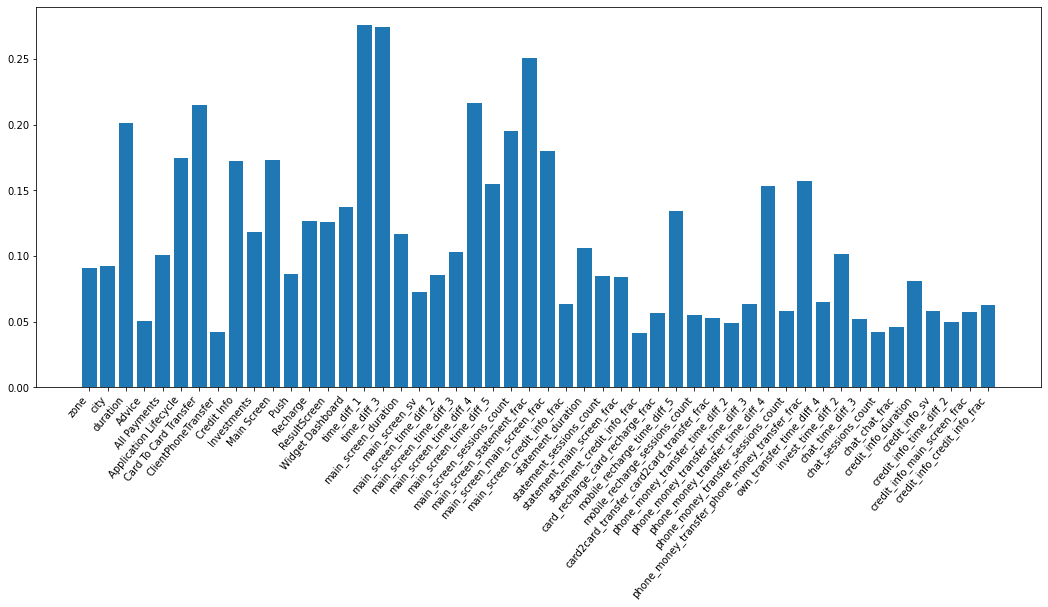

In [1065]:
plt.figure(figsize=(18, 7))
plt.bar(X_test.columns[(model.feature_importances_ < 0.3) & (model.feature_importances_ > 0.04)], 
        model.feature_importances_[(model.feature_importances_ < 0.3) & (model.feature_importances_ > 0.04)])
plt.xticks(rotation=50, ha='right')
plt.show()

In [1066]:
X_test.columns[(model.feature_importances_ > 0) & (model.feature_importances_ < 0.04)]

Index(['mobile_x', 'retail', 'pv', 'se', 'sv', 'Bank_Offer', 'Operations',
       'ReverseCashBack', 'net_connection_type', 'main_screen_se',
       ...
       'credit_info_statement_frac', 'credit_info_mobile_recharge_frac',
       'credit_info_chat_frac', 'credit_info_card_recharge_frac',
       'credit_info_phone_money_transfer_frac', 'credit_info_invest_frac',
       'credit_info_card2card_transfer_frac', 'credit_info_own_transfer_frac',
       'main_screen_fromday_toweek', 'invest_fromweek_tomonth'],
      dtype='object', length=123)

In [1068]:
X_test.columns[model.feature_importances_ <= 0.01]

Index(['mobile_x', 'retail', 'pv', 'ReverseCashBack', 'statement_se',
       'statement_time_diff_1', 'statement_card_recharge_frac',
       'statement_invest_frac', 'card_recharge_time_diff_1',
       'card_recharge_main_screen_frac', 'card_recharge_mobile_recharge_frac',
       'card_recharge_chat_frac', 'card_recharge_invest_frac',
       'card_recharge_card2card_transfer_frac',
       'card_recharge_own_transfer_frac', 'mobile_recharge_duration',
       'mobile_recharge_se', 'mobile_recharge_time_diff_1',
       'mobile_recharge_statement_frac', 'mobile_recharge_chat_frac',
       'mobile_recharge_credit_info_frac',
       'mobile_recharge_card_recharge_frac',
       'mobile_recharge_phone_money_transfer_frac',
       'mobile_recharge_card2card_transfer_frac',
       'mobile_recharge_own_transfer_frac', 'card2card_transfer_se',
       'card2card_transfer_sv', 'card2card_transfer_time_diff_5',
       'card2card_transfer_sessions_count',
       'card2card_transfer_mobile_recharge_fra

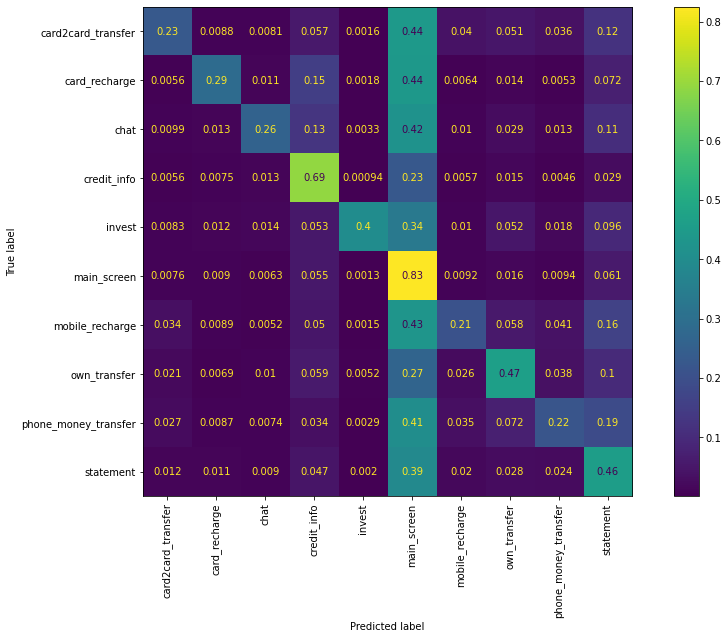

In [1069]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 9))
plot_confusion_matrix(model, X_train_val, y_train_val, normalize='true', xticks_rotation='vertical', ax=ax)
plt.show()

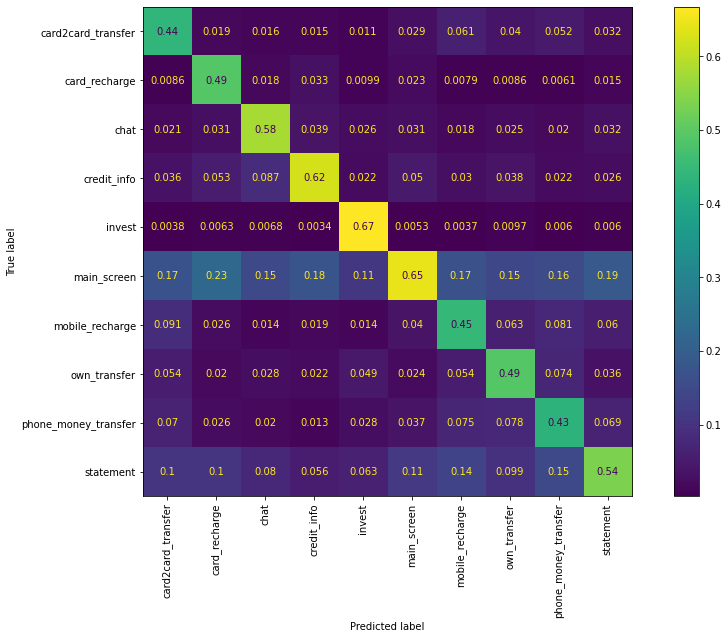

In [1070]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 9))
plot_confusion_matrix(model, X_train_val, y_train_val, normalize='pred', xticks_rotation='vertical', ax=ax)
plt.show()

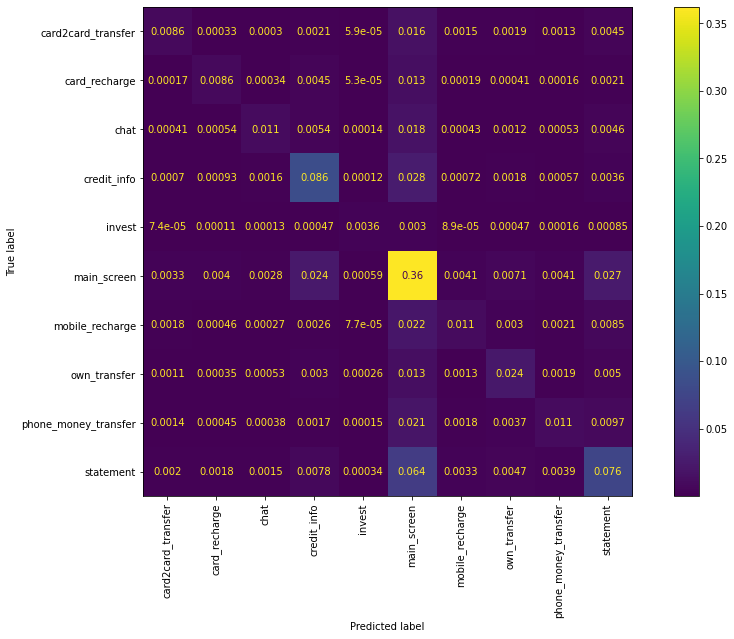

In [1071]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 9))
plot_confusion_matrix(model, X_train_val, y_train_val, normalize='all', xticks_rotation='vertical', ax=ax)
plt.show()

In [1072]:
print('F1 на обучении:', 
        round(f1_score(
            y_true=y_train_val,
            y_pred=model.predict(X_train_val),
            average='macro'
        ), 5)
     )

F1 на обучении: 0.44567


In [1073]:
# сохраняем модель
# import joblib
# joblib.dump(value=model, filename='catboost_model_10.pkl')

In [1074]:
# for i, data in enumerate([X_train_val, X_test, X_train, X_val]):
#     data.to_csv(f'X_new_{i}.csv', index=False, header=True)

# for i, data in enumerate([y_train_val, y_test, y_train, y_val]):
#     data.to_csv(f'y_new_{i}.csv', index=False, header=True)

In [1075]:
sample_sub['client_pin'] = X_test.client_pin.values
sample_sub['prediction'] = model.predict(X_test)

sample_sub.to_csv('alfaboosters_12.csv', index=False)